In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.metrics import accuracy_score 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier

import time
import warnings
warnings.filterwarnings('ignore')

In [5]:
#importing the dataset
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [6]:
#importing the dataset
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [7]:
#importing the dataset
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission.csv


In [13]:
train=pd.read_csv('train.csv', header = 0)

In [14]:
test=pd.read_csv('test.csv', header = 0)

In [15]:
submission=pd.read_csv('sample_submission.csv', header = 0)

# Train Data Set

In [16]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [17]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [21]:
print('Count of NaN in different categories')
train.isna().sum().sort_values(ascending = False)

Count of NaN in different categories


CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [22]:
print('{} rows with missing values'.format(sum(train.isna().sum())))

2324 rows with missing values


# Test Data Set

In [23]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [24]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [25]:
test.isna().sum().sort_values(ascending = False)

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64

In [26]:
print('{} rows with missing values'.format(sum(test.isna().sum())))

1117 rows with missing values


# Submission File

In [27]:
submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


# Exploratory Data Analysis (EDA)

In [28]:
TARGET = 'Transported'
FEATURES = [col for col in train.columns if col != TARGET]
RANDOM_STATE = 12

In [29]:
train.iloc[:, :-1].describe().T.sort_values(by='std', ascending = False)\
                  .style.background_gradient(cmap='GnBu')\
                  .bar(subset=["max"], color='red')\
                  .bar(subset=["mean",], color='green')

,count,mean,std,min,25%,50%,75%,max
FoodCourt,8510.000000,458.077203,1611.489240,0.000000,0.000000,0.000000,76.000000,29813.000000
VRDeck,8505.000000,304.854791,1145.717189,0.000000,0.000000,0.000000,46.000000,24133.000000
Spa,8510.000000,311.138778,1136.705535,0.000000,0.000000,0.000000,59.000000,22408.000000
RoomService,8512.000000,224.687617,666.717663,0.000000,0.000000,0.000000,47.000000,14327.000000
ShoppingMall,8485.000000,173.729169,604.696458,0.000000,0.000000,0.000000,27.000000,23492.000000
Age,8514.000000,28.827930,14.489021,0.000000,19.000000,27.000000,38.000000,79.000000


# Distribution of Age

In [30]:
train_age = train.copy()
test_age = test.copy()
train_age['type'] = 'Train'
test_age['type'] = 'Test'
ageDF = pd.concat([train_age, test_age])
fig = px.histogram(data_frame = ageDF,
                   x = 'Age',
                   color = 'type',
                   color_discrete_sequence = ['#58D68D','#DE3163'],
                   marginal = 'box',
                   nbins = 100,
                   template = 'plotly_white'
                  )
fig.show()


# Target Distribution

In [31]:
target_df = pd.DataFrame(train[TARGET].value_counts()).reset_index()
target_df.columns = [TARGET, 'count']
print('Percentage of Transported = 0: {}'.format(target_df['count'][0]*100 / train.shape[0]))
print('Percentage of Transported = 1: {}'.format(target_df['count'][1]*100 / train.shape[0]))

Percentage of Transported = 0: 50.362360519958585
Percentage of Transported = 1: 49.637639480041415


# Correlation Matrix

In [32]:
fig = px.imshow(train.corr(), text_auto = True, aspect = 'auto', color_continuous_scale = 'viridis')
fig.show()


# Data Pre-Processing

In [33]:
imputer_cols = ['Age', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'RoomService']
imputer = SimpleImputer(strategy = 'median')
imputer.fit(train[imputer_cols])
train[imputer_cols] = imputer.transform(train[imputer_cols])
test[imputer_cols] = imputer.transform(test[imputer_cols])
train['HomePlanet'].fillna('Z', inplace = True)
test['HomePlanet'].fillna('Z', inplace = True)

In [34]:
label_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
def label_encoder(train, test, columns):
    for col in columns:
        train[col] = train[col].astype(str)
        test[col] = test[col].astype(str)
        train[col] = LabelEncoder().fit_transform(train[col])
        test[col] = LabelEncoder().fit_transform(test[col])
    return train, test

train, test = label_encoder(train, test, label_cols)

In [35]:
train.drop(['Name', 'Cabin', 'PassengerId'], axis = 1, inplace = True)
test.drop(['Name', 'Cabin', 'PassengerId'], axis = 1, inplace = True)

In [36]:
X = train.drop(TARGET, axis = 1)
y = train[TARGET].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = RANDOM_STATE,
                                                    test_size = 0.3)

# Modeling

In [37]:
model = RandomForestClassifier(n_estimators=1000,
                             max_depth=40)


In [38]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=40, n_estimators=1000)

In [39]:
RFC_prediction = model.predict(X_test)

In [41]:
accuracy_score(y_test, RFC_prediction)

0.7710889570552147

In [42]:
xgb_params = {'learning_rate': 0.1,
              'n_estimators': 50,
              'max_depth': 7,
              'min_child_weight': 2,
              'gamma': 0,
              'subsample': 0.8,
              'colsample_bytree': 0.8,
              'objective': 'binary:logistic',
              'nthread': 4,
              'scale_pos_weight': 1,
              'seed': 30
             }

In [43]:
FOLDS = 4

xgb_predictions = 0
xgb_scores = []
xgb_fimp = []
XGB_FEATURES = list(train.columns)[:-1]
skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=RANDOM_STATE)
for fold, (train_idx, valid_idx) in enumerate(skf.split(train[XGB_FEATURES], train[TARGET])):
    print(f'\033[94m')
    print(10*"=", f"Fold={fold+1}", 10*"=")
    start_time = time.time()
    
    X_train, X_valid = train.iloc[train_idx][XGB_FEATURES], train.iloc[valid_idx][XGB_FEATURES]
    y_train , y_valid = train[TARGET].iloc[train_idx] , train[TARGET].iloc[valid_idx]
    
    model = XGBClassifier(**xgb_params)
    #model = KNeighborsClassifier(n_neighbors=250)
    model.fit(X_train, y_train)
    
    preds_valid = model.predict(X_valid)
    acc = accuracy_score(y_valid,  preds_valid.astype('bool'))
    xgb_scores.append(acc)
    run_time = time.time() - start_time
    
    fim = pd.DataFrame(index=XGB_FEATURES,
                 data=model.feature_importances_,
                 columns=[f'{fold}_importance'])
    xgb_fimp.append(fim)
    
    print(f"Fold={fold+1}, Accuracy score: {acc:.2f}%, Run Time: {run_time:.2f}s")
    test_preds = model.predict(test[XGB_FEATURES])
    xgb_predictions += test_preds
print("")
print("Mean Accuracy :", np.mean(xgb_scores))


========== Fold=1 ==========
Fold=1, Accuracy score: 0.81%, Run Time: 1.06s

========== Fold=2 ==========
Fold=2, Accuracy score: 0.78%, Run Time: 1.06s

========== Fold=3 ==========
Fold=3, Accuracy score: 0.79%, Run Time: 0.42s

========== Fold=4 ==========
Fold=4, Accuracy score: 0.80%, Run Time: 0.43s

Mean Accuracy : 0.7971911381252987


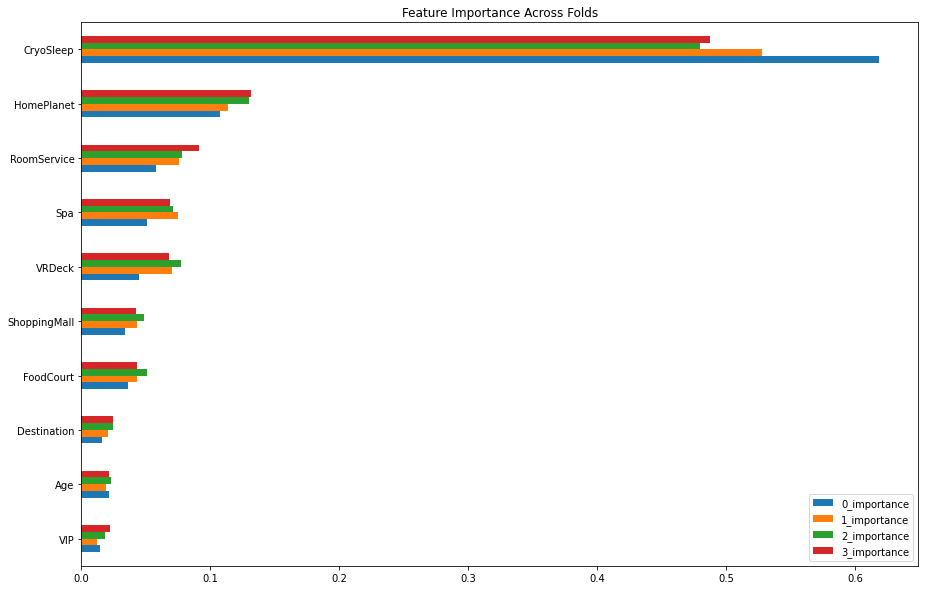

In [44]:
xgb_fis_df = pd.concat(xgb_fimp, axis=1).head(15)
xgb_fis_df.sort_values('1_importance').plot(kind='barh', figsize=(15, 10),
                                       title='Feature Importance Across Folds')
plt.show()


In [46]:
submission[TARGET] = xgb_predictions.astype('bool')
submission.to_csv("submission.csv",index=False)
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
